In [1]:
from environment import Environment

In [2]:
from IPython.display import clear_output
%matplotlib inline
import time

In [3]:
import numpy as np

In [4]:
#%matplotlib inline
#env = Environment(grid_size=100, n_goals=10)
#env.render()

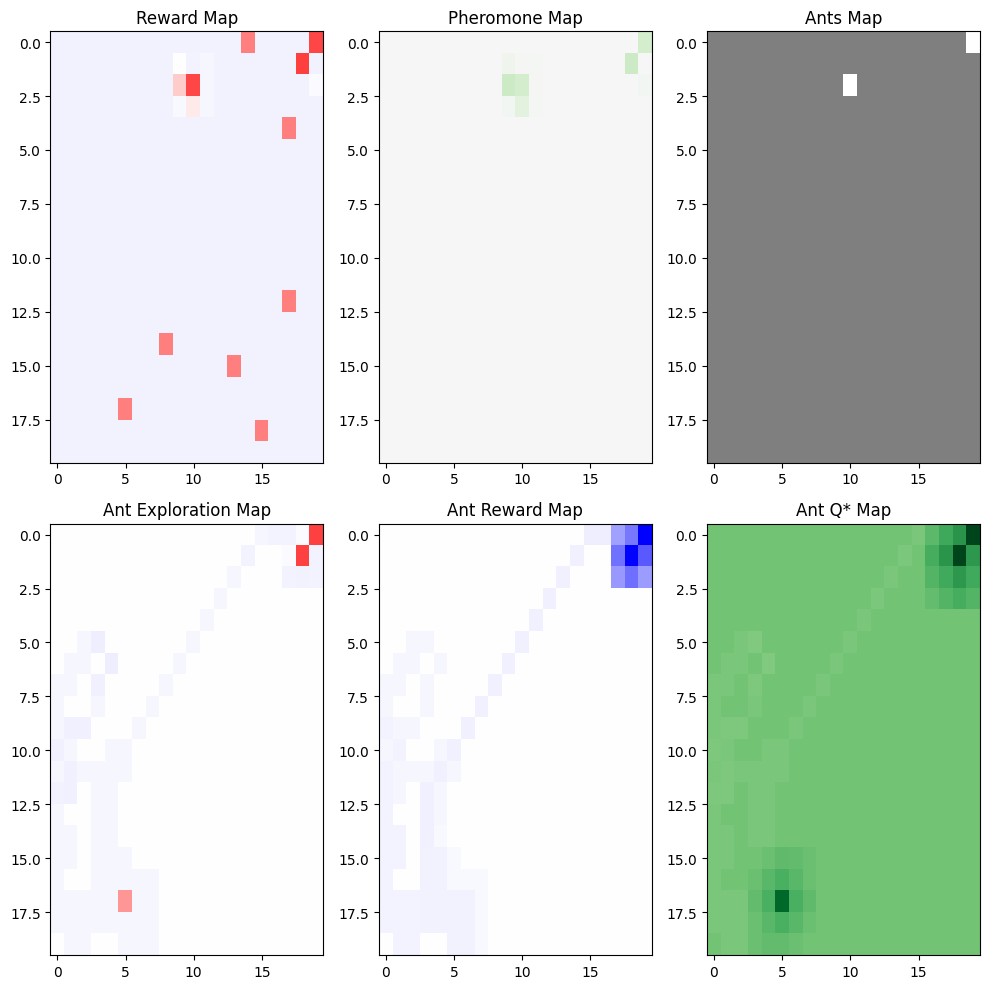

In [ ]:
env = Environment(grid_size=20, n_goals=10, n_ants=5)
for step in range(1000):
    env.step()
    env.render()

In [ ]:
env.ants[0].map_exploration

array([[3395.05030958, 3347.11805961, 3300.99457378, ..., 7167.22794444,
        7294.74581702, 7424.07245375],
       [3296.47266341, 3248.54041343, 3202.41692761, ..., 7068.65029827,
        7196.16817085, 7325.49480757],
       [3199.70378138, 3151.77153141, 3105.64804558, ..., 6971.88141624,
        7099.39928882, 7228.72592555],
       ...,
       [2254.624513  , 2206.69226302, 2160.5687772 , ..., 6026.80214786,
        6154.32002043, 6283.64665716],
       [2331.49698937, 2283.5647394 , 2237.44125357, ..., 6103.67462423,
        6231.19249681, 6360.51913354],
       [2410.1782299 , 2362.24597992, 2316.1224941 , ..., 6182.35586476,
        6309.87373734, 6439.20037406]], shape=(100, 100))

In [ ]:
q_star_map = np.zeros((10, 10))
q_star_map[5, 5] = 1.0  # Example value for the center of the map
q_star_map

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# apply convolution to the q_star_map with max pooling
q_star_map_pooled = maximum_filter(q_star_map, size=3, mode='constant', cval=0.0)
q_star_map_pooled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# apply average pooling to the q_star_map
q_star_map_avg_pooled = uniform_filter(q_star_map, size=3, mode='constant', cval=0.0)
# reduce to two decimal places
q_star_map_avg_pooled = np.round(q_star_map_avg_pooled, 2)
q_star_map_avg_pooled

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.11, 0.11, 0.11, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.11, 0.11, 0.11, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.11, 0.11, 0.11, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])